<a href="https://colab.research.google.com/gist/fernandoferreira-me/61e9e4a25060f95abbfdb8cb90aaaed9/question-rio-projeto-de-disciplina-de-text-mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Disciplina de Processamento de Linguagem Natural com Python

Bem-vindo ao projeto de disciplina de **Processamento de Linguagem Natural com Python**. Ao longo das últimas aulas vimos uma série de aplicações que nos deram a amplitude de possibilidades em trabalhar com textos. Para tal, usamos diversas bibliotecas, onde as que mais se destacaram foram NLTK, SPACY e GENSIM.

Esse notebook servirá de guia para a execução de uma análise de tópicos completa, usando o algoritmo de LDA e recursos para interpretação dos resultados. Utilizaremos notícias da seção "Mercado" extraídas da Folha de S. Paulo no ano de 2016.  Complete a análise com os códigos que achar pertinente e responda as questões presentes no Moodle. Boa sorte!

## O Notebook

Nesse notebook, você será guiado pela análise de **Extração de Tópicos**. As seguintes tarefas serão realizadas


1.   Download dos dados provenientes do kaggle 
2.   Seleção dos dados relevantes para a nossa análise
3.   Instalação das principais ferramentas e importação de módulos
4.   Pré-processamento usando NLTK
5.   Pré-processamento usando Spacy
6.   Análise de tópicos usando LDA
7.   Análise de NER usando Spacy
8.   Visualização dos tópicos usando tokens e entidades.



## Instruções para baixar os dados

Para baixar os dados será necessário o uso do gerenciador de downloads da Kaggle. A Kaggle, uma subsidiária do grupo Alphabet (Google), é uma comunidade on-line de cientistas de dados e profissionais de aprendizado de máquina.

Para utilizar o gerenciador, será necessário criar uma conta no site Kaggle.com.
Com a conta criada, obtenha um token de acesso, no formato kaggle.json

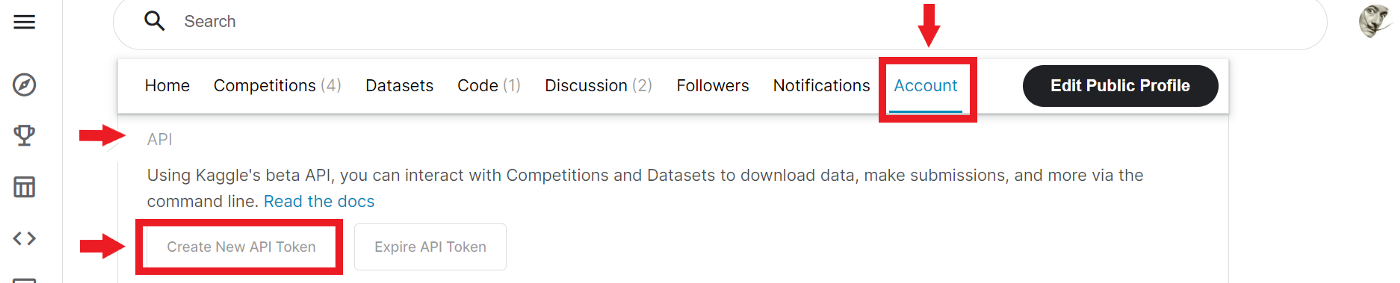

Em posse do token (baixe para seu computador), execute a células da próxima seção para acessar os dados de interesse e baixá-los.

**1. Qual o endereço do seu notebook (colab) executado? Use o botão de compartilhamento do colab para obter uma url**

O notebook foi executado localmente em um notebook mantido pelo Anaconda, entretanto disponibilizei o código, pdf, html e requirements no github abaixo:

https://github.com/Herikc2/Processamento-de-linguagem-natural-com-Python

# Baixe os dados

Instale o gerenciador kaggle no ambiente do Colab e faça o upload do arquivo kaggle.json 

In [1]:
# Instalando depedências para importar notebook do kaggle
!pip install -q kaggle
!pip install -q opendatasets


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**4. Em qual célula está o download dos dados diretamente do kaggle?**

Realizei o download utilizando o opendatasets. O kaggle.json esta no mesmo diretório no notebook.

In [2]:
import opendatasets as od
import shutil
od.download("https://www.kaggle.com/datasets/marlesson/news-of-the-site-folhauol")

source_folder = 'news-of-the-site-folhauol'
destination_folder = '../data/news-of-the-site-folhauol'

shutil.move(source_folder, destination_folder)

100%|███████████████████████████████████████████████████████████████████████████████| 187M/187M [00:21<00:00, 9.00MB/s]


'../data/news-of-the-site-folhauol\\news-of-the-site-folhauol'

## Criar o DataFrame com os dados lidos diretamente da plataforma Kaggle

In [3]:
# Importdando os dados e bibliotecas de manipulação dos dados
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()

df = pd.read_csv(r"..\data\news-of-the-site-folhauol\articles.csv")

C:\Users\herik\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\herik\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\herik\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
df.head()

,title,text,date,category,subcategory,link
0,"Lula diz que está 'lascado', mas que ainda tem...",Com a possibilidade de uma condenação impedir ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
1,"'Decidi ser escrava das mulheres que sofrem', ...","Para Oumou Sangaré, cantora e ativista malines...",2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
2,Três reportagens da Folha ganham Prêmio Petrob...,Três reportagens da Folha foram vencedoras do ...,2017-09-10,poder,NaN,http://www1.folha.uol.com.br/poder/2017/10/192...
3,Filme 'Star Wars: Os Últimos Jedi' ganha trail...,A Disney divulgou na noite desta segunda-feira...,2017-09-10,ilustrada,NaN,http://www1.folha.uol.com.br/ilustrada/2017/10...
4,CBSS inicia acordos com fintechs e quer 30% do...,"O CBSS, banco da holding Elopar dos sócios Bra...",2017-09-10,mercado,NaN,http://www1.folha.uol.com.br/mercado/2017/10/1...


# Atualizar o SPACY e  instalar os modelos pt_core_news_lg

**3. Em qual célula está o código que atualiza o spacy e instala o pacote pt_core_news_lg?**

Atualizando o spacy para a ultima versão disponível e instalando em moto quiet. Realizando download local do pt_core_news_lg.

In [5]:
!pip install -q -U spacy

import spacy
from spacy.lang.pt.stop_words import STOP_WORDS

# Baixando pacote de NLP em português
spacy.cli.download("pt_core_news_lg")


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


## Instalar os datasets `stopwords`, `punkt` e `rslp` do nltk

In [6]:
# Baixando ferramentas de NLP do NLTK

import nltk

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("rslp")

from nltk.corpus import stopwords
from nltk.tokenize import punkt
from nltk.stem import rslp

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\herik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\herik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\herik\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


## Carregar os módulos usados ao longo desse notebook

In [7]:
!pip install pyldavis==3.4.1

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

from typing import List, Set, Any

SEED = 123
debug = False


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\herik\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\herik\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


# Filtrando os dados para utilizar apenas as notícias do ano de 2016 e da categoria "Mercado"

Filtre os dados do DataFrame df e crie um DataFrame news_2016 que contenha apenas notícias de **2016** e da categoria **mercado**.

**5. Em qual célula está a criação do dataframe news_2016 (com examente 7943 notícias)?**

Caso debug seja False irá realizar os filtros solicitados no projeto, caso True irá executar de forma reduzida para encurtar.

In [8]:
df['date'] = pd.to_datetime(df.date)

# Se False irá carregar os dados conforme solicitação do projeto, caso contrário irá carregar uma sample menor
if debug == False:
  # Create a dataframe named news_2016
  news_2016 = df.loc[(df['date'].dt.year == 2016) & (df['category'] == 'mercado')].reset_index(drop = True)
else:
  # When debugin will filter just by 2016 and first month to execute faster
  news_2016 = df.loc[(df['date'].dt.year == 2016) & (df['date'].dt.month == 1) & (df['category'] == 'mercado')].reset_index(drop = True)

In [9]:
news_2016.shape

(7943, 6)

In [10]:
news_2016.head()

,title,text,date,category,subcategory,link
0,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
1,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
2,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
3,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...
4,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...


## NLTK Tokenizer and Stemmer

Crie uma coluna no dataframe `news_2016` contendo os tokens para cada um dos textos. Os tokens devem estar representados pelo radical das palavras (stem). 
Para tal, complete o conteúdo da função `tokenize`.

**2. Em qual célula está o código que realiza o download dos pacotes necessários para tokenização e stemming usando nltk?**

Importação dos pacotes utilizados para tokenização e stemming.

In [11]:
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer

**6. Em qual célula está a função que tokeniza e realiza o stemming dos textos usando funções do nltk?**

Abaixo esta realizando a função de tokenização, a coluna gerada não é utilizada para outros fins durante o código.

In [12]:
def tokenize(text: str) -> List:
    """
      Function for tokenizing using `nltk.tokenize.word_tokenize`

      Returns:
        - A list of stemmed tokens (`nltk.stem.RSLPStemmer`)
        IMPORTANT: Only tokens with alphabetic
                   characters will be returned.
    """
    st = RSLPStemmer()
    
    token_text = word_tokenize(text, language = 'portuguese')
    
    return [st.stem(word) for word in token_text if word.isalnum()]

news_2016.loc[:, 'nltk_tokens'] = news_2016.text.progress_map(tokenize)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [13]:
news_2016.head()

,title,text,date,category,subcategory,link,nltk_tokens
0,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri..."
1,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c..."
2,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont..."
3,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, 19, se, diz, ..."
4,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d..."


## Criar uma documento SPACY para cada texto do dataset

Crie uma coluna `spacy_doc` que contenha os objetos spacy para cada texto do dataset de interesse. Para tal, carregue os modelos `pt_core_news_lg` e aplique em todos os textos (pode demorar alguns minutos...)

**9. Em qual célula o modelo pt_core_news_lg está sendo carregado? Todos os textos do dataframe precisam ser analisados usando os modelos carregados. Em qual célula isso foi feito?**

Abaixo esta sendo carregado o pt_core_news_lg e gerado os documentos para cada linha do dataframe.

In [14]:
# Gerando coluna de Document usando o spacy
nlp_pt = spacy.load("pt_core_news_lg")

news_2016.loc[:, 'spacy_doc'] = news_2016['text'].apply(nlp_pt)

In [15]:
news_2016.head()

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc
0,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro..."
1,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle..."
2,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d..."
3,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, 19, se, diz, ...","(Desde, as, primeiras, décadas, do, século, 19..."
4,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d...","(O, Cifras, &, Letras, seleciona, semanalmente..."


## Realize a Lematização usando SPACY

O modelo NLP do spacy oferece a possiblidade de lematizar textos em português (o que não acontece com a biblioteca NLTK). Iremos criar uma lista de tokens
lematizados para cada texto do nosso dataset. Para tal, iremos retirar as 
stopwords, usando uma função que junta stopwords provenientes do NLTK e do Spacy. Essa lista completa, é retornada pela função stopwords (e você não precisa mexer).

Já a função filter retorna True caso o token seja composto por caracters alfabéticos, não estiver dentro da lista de stopwords e o lemma resultante não estiver contido na lista `o", "em", "em o", "em a" e "ano"`.

Crie uma coluna chamada `spacy_lemma` para armazenar o resultado desse pré-processamento.

In [16]:
# Stopwords manuais
additional_stop_words = ['de',  'a',  'o',  'que',  'e',  'do',  'da',  'em',  'um',  'para',  'é',  'com',  'não',  'uma',  'os',  'no',  'se',  'na',  'por',  'mais',  'as',  'dos',  'como',  'mas',  'foi',  'ao',  'ele',  'das',  'tem',  'à',  'seu',  'sua',  'ou',  'ser',  'quando',  'muito',  'há',  'nos',  'já',  'está',  'eu',  'também',  'só',  'pelo',  'pela',  'até',  'isso',  'ela',  'entre',  'era',  'depois',  'sem',  'mesmo',  'aos',  'ter',  'seus',  'quem',  'nas',  'me',  'esse',  'eles',  'estão',  'você',  'tinha',  'foram',  'essa',  'num',  'nem',  'suas',  'meu',  'às',  'minha',  'têm',  'numa',  'pelos',  'elas',  'havia',  'seja',  'qual',  'será',  'nós',  'tenho',  'lhe',  'deles',  'essas',  'esses',  'pelas',  'este',  'fosse',  'dele',  'tu',  'te',  'vocês',  'vos',  'lhes',  'meus',  'minhas',  'teu',  'tua',  'teus',  'tuas',  'nosso',  'nossa',  'nossos',  'nossas',  'dela',  'delas',  'esta',  'estes',  'estas',  'aquele',  'aquela',  'aqueles',  'aquelas',  'isto',  'aquilo',  'estou',  'está',  'estamos',  'estão',  'estive',  'esteve',  'estivemos',  'estiveram',  'estava',  'estávamos',  'estavam',  'estivera',  'estivéramos',  'esteja',  'estejamos',  'estejam',  'estivesse',  'estivéssemos',  'estivessem',  'estiver',  'estivermos',  'estiverem',  'hei',  'há',  'havemos',  'hão',  'houve',  'houvemos',  'houveram',  'houvera',  'houvéramos',  'haja',  'hajamos',  'hajam',  'houvesse',  'houvéssemos',  'houvessem',  'houver',  'houvermos',  'houverem',  'houverei',  'houverá',  'houveremos',  'houverão',  'houveria',  'houveríamos',  'houveriam',  'sou',  'somos',  'são',  'era',  'éramos',  'eram',  'fui',  'foi',  'fomos',  'foram',  'fora',  'fôramos',  'seja',  'sejamos',  'sejam',  'fosse',  'fôssemos',  'fossem',  'for',  'formos',  'forem',  'serei',  'será',  'seremos',  'serão',  'seria',  'seríamos',  'seriam',  'tenho',  'tem',  'temos',  'tém',  'tinha',  'tínhamos',  'tinham',  'tive',  'teve',  'tivemos',  'tiveram',  'tivera',  'tivéramos',  'tenha',  'tenhamos',  'tenham',  'tivesse',  'tivéssemos',  'tivessem',  'tiver',  'tivermos',  'tiverem',  'terei',  'terá',  'teremos',  'terão',  'teria',  'teríamos',  'teriam']

**7. Em qual célula está a função que realiza a lematização usando o spacy?**

In [17]:
def stopwords() -> Set:
    """
    Return complete list of stopwords
    """
    return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS) + list(additional_stop_words))
    #return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS))

complete_stopwords = stopwords()

def filter(w: spacy.lang.pt.Portuguese) -> bool:
    """
    Filter stopwords and undesired tokens
    """
    undesired_tokens = ["o", "em", "em o", "em a", "ano"]
    
    w = w.lemma_.lower().strip()
    
    # Removendo caracteres não alfanumeriscos, stopwords e lista de não desejados
    if w.isalpha() and w not in complete_stopwords and w not in undesired_tokens:
        return True
    else:
        return False


def lemma(doc: spacy.lang.pt.Portuguese) -> List[str]:
    """
    Apply spacy lemmatization on the tokens of a text

    Returns:
       - a list representing the standardized (with lemmatisation) vocabulary
    """ 

    return [str(token.lemma_) for token in doc if filter(token)]

news_2016.loc[:, 'spacy_lemma'] = news_2016.spacy_doc.progress_map(lemma)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [18]:
news_2016.head()

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma
0,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, Christine, Conder, modést..."
1,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, celular, controle, ficar, cara, decisã..."
2,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d...","[projeto, ajuste, conta, público, aprovar, mau..."
3,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, 19, se, diz, ...","(Desde, as, primeiras, décadas, do, século, 19...","[década, século, nota, ópera, sinfonia, brotar..."
4,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d...","(O, Cifras, &, Letras, seleciona, semanalmente...","[Cifras, Letras, selecionar, semanalmente, lan..."


**8. Baseado nos resultados qual a diferença entre stemming e lematização, qual a diferença entre os dois procedimentos? Escolha quatro palavras para exemplificar.**


**Stemming:** Mantem somente a raiz.

**Lematização:** Reduz para palavra base.


**Exemplos:**

| Original  | Stemmer | Lemma    |
|-----------|---------|----------|
| amigos    | amig    | amigo    |
| amigas    | amig    | amigo    |
| amizade   | amizad  | amizade  |
| carreira  | carr    | carreira |
| carreiras | carr    | carreira |

## Reconhecimento de entidades nomeadas

Crie uma coluna `spacy_ner` que armazene todas as organizações (APENAS organizações) que estão contidas no texto.

**10. Indique a célula onde as entidades dos textos foram extraídas. Estamos interessados apenas nas organizações.**

Abaixo esta sendo gerado as entidades filtrando por organização conforme desejado, a organização é extraida diretamente do spacy document.

In [19]:
def NER(doc: spacy.lang.pt.Portuguese):
    """
      Return the list of organizations for a SPACY document
    """

    target_label = 'ORG'
    
    entities = [(token.text, token.label_) for token in doc.ents]
    
    desired_entities = [entity[0] for entity in entities if entity[1] == target_label]
    
    return desired_entities

news_2016.loc[:, 'spacy_ner'] = news_2016.spacy_doc.progress_map(NER)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [20]:
news_2016.head()

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma,spacy_ner
0,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, Christine, Conder, modést...","[Ofcom, Cavamos, LEMA, Membro, Ordem do Impéri..."
1,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, celular, controle, ficar, cara, decisã...","[Oi, TIM, Claro, Vivo, GERCINA, FERNANDA BRIGA..."
2,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d...","[projeto, ajuste, conta, público, aprovar, mau...","[Executivo dos três Estados, Assembleias locai..."
3,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, 19, se, diz, ...","(Desde, as, primeiras, décadas, do, século, 19...","[década, século, nota, ópera, sinfonia, brotar...","[MIT, Instituto de Tecnologia de Massachusetts..."
4,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d...","(O, Cifras, &, Letras, seleciona, semanalmente...","[Cifras, Letras, selecionar, semanalmente, lan...","[NACIONAIS , Presidente da Singularity Univer..."


## Salvando/Carregando Spacy Data

Salvando o dataframe localmente para não precisar executar todas as celulas novamente.

In [21]:
# Carrega os dados localmente ou salva
if not 'news_2016' in locals():
    news_2016 = pd.read_pickle("../data/news_2016")
else:
    news_2016.to_pickle("../data/news_2016")

In [22]:
news_2016.head(3)

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma,spacy_ner
0,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, Christine, Conder, modést...","[Ofcom, Cavamos, LEMA, Membro, Ordem do Impéri..."
1,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, celular, controle, ficar, cara, decisã...","[Oi, TIM, Claro, Vivo, GERCINA, FERNANDA BRIGA..."
2,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d...","[projeto, ajuste, conta, público, aprovar, mau...","[Executivo dos três Estados, Assembleias locai..."


## Bag-of-Words

Crie uma coluna `tfidf` no dataframe `news_2016`. Use a coluna `spacy_lemma` como base para cálculo do TFIDF. 
O número máximo de features que iremos considerar é 5000. E o token, tem que ter aparecido pelo menos 10 vezes (`min_df`) nos documentos. 

In [23]:
# Convertendo coluna de lemmas para coluna
doc_tokens = news_2016.spacy_lemma.values.tolist()

In [24]:
# Gerando TF para comparações

# Criando corpus com todos os lemmas separados por espaço
corpus = [' '.join(tokens) for tokens in doc_tokens]

tf_vectorizer = CountVectorizer(max_features = 5000, min_df = 10, lowercase = True)

tf_matrix = tf_vectorizer.fit_transform(corpus)

**13. Indique a célula onde está a função que cria o vetor de TF-IDF para cada texto.**

Abaixo esta sendo criada a classe onde é construido o TFIDF, além disso é armazenado a matrix resultante do treinamento em uma veriavel separada da transformação.

In [25]:
class Vectorizer:
    def __init__(self, doc_tokens: List):
        self.doc_tokens = doc_tokens
        self.tfidf = None
        self.tfidf_matrix = None

    def vectorizer(self):
        """
        Convert a list of tokens to tfidf vector
        Returns the tfidf vector and attribute it to self.tfidf
        """
        
        # Gerando corpus a partir do documento alvo
        corpus = [' '.join(tokens) for tokens in self.doc_tokens]
        
        # Utilizando mesmo parâmetros do TF
        self.tfidf = TfidfVectorizer(**tf_vectorizer.get_params())
        
        # Treinando TFIDF
        self.tfidf_matrix = self.tfidf.fit_transform(corpus)

    def __call__(self):
        if self.tfidf is None:
            self.vectorizer()
        return self.tfidf

vectorizer = Vectorizer(doc_tokens)

def tokens2tfidf(tokens):
    text = ' '.join(tokens)
    array = vectorizer().transform([text]).toarray()[0]
    return array


news_2016.loc[:, 'tfidf'] = news_2016.spacy_lemma.progress_map(tokens2tfidf)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [26]:
news_2016.head()

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma,spacy_ner,tfidf
0,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, Christine, Conder, modést...","[Ofcom, Cavamos, LEMA, Membro, Ordem do Impéri...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, celular, controle, ficar, cara, decisã...","[Oi, TIM, Claro, Vivo, GERCINA, FERNANDA BRIGA...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d...","[projeto, ajuste, conta, público, aprovar, mau...","[Executivo dos três Estados, Assembleias locai...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, 19, se, diz, ...","(Desde, as, primeiras, décadas, do, século, 19...","[década, século, nota, ópera, sinfonia, brotar...","[MIT, Instituto de Tecnologia de Massachusetts...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d...","(O, Cifras, &, Letras, seleciona, semanalmente...","[Cifras, Letras, selecionar, semanalmente, lan...","[NACIONAIS , Presidente da Singularity Univer...","[0.0, 0.04244152316513821, 0.0, 0.0, 0.0, 0.0,..."


## Extração de Tópicos

Realize a extração de 9 tópicos usando a implementação do sklearn do algoritmo Latent Dirichlet Allocation. Como parâmetros, você irá usar o número máximo de iterações igual à 100 (pode demorar) e o `random_seed` igual a `SEED` que foi setado no início do notebook

In [27]:
# Definir o número de tópicos desejado
N_TOKENS = 9

# Get the feature names from the TfidfVectorizer object
feature_names = vectorizer().get_feature_names_out()

In [28]:
corpus = np.array(news_2016.tfidf.tolist())

# Cria modelo do LDA baseado somente no corpus
lda_model_corpus = LDA(n_components=N_TOKENS, random_state=SEED)
lda_model_corpus.fit(corpus)

# Cria mapa por topico
topic_words = {}
for i, topic in enumerate(lda_model_corpus.components_):
    word_idx = topic.argsort()[::-1][:10]
    topic_words["Tópico %d" % (i+1)] = [feature_names[w] for w in word_idx]

# Imprime o mapa por topico
for topic, words in topic_words.items():
    print(topic + ":")
    print(words)
    print()

Tópico 1:
['empresa', 'milhão', 'companhia', 'negócio', 'serviço', 'brasil', 'venda', 'bilhão', 'mercado', 'outro']

Tópico 2:
['imóvel', 'poupança', 'caixa', 'grécia', 'fgts', 'greve', 'imobiliário', 'resgate', 'grego', 'atendimento']

Tópico 3:
['editora', 'pág', 'voo', 'crédito', 'autor', 'aéreo', 'cartão', 'gol', 'inadimplência', 'aeronave']

Tópico 4:
['petrobras', 'petróleo', 'bilhão', 'companhia', 'empresa', 'estatal', 'gás', 'venda', 'energia', 'milhão']

Tópico 5:
['contribuinte', 'declaração', 'ficha', 'restituição', 'receita', 'energia', 'aneel', 'rendimento', 'bandeira', 'cpf']

Tópico 6:
['índice', 'queda', 'dólar', 'banco', 'mercado', 'alta', 'juro', 'petróleo', 'subir', 'preço']

Tópico 7:
['pokémon', 'go', 'arena', 'espm', 'nintendo', 'publicidade', 'jogador', 'jogo', 'marketing', 'folha']

Tópico 8:
['governo', 'bilhão', 'presidente', 'proposta', 'público', 'ministro', 'temer', 'medida', 'afirmar', 'dívida']

Tópico 9:
['aposentadoria', 'benefício', 'idade', 'inss', 'c

In [29]:
# Cria modelo do LDA baseado no TF gerado anteriormente
lda_model_tf = LDA(n_components=N_TOKENS, random_state=SEED)
lda_model_tf.fit(tf_matrix)

# Cria mapa por topico
topic_words = {}
for i, topic in enumerate(lda_model_tf.components_):
    word_idx = topic.argsort()[::-1][:10]
    topic_words["Tópico %d" % (i+1)] = [feature_names[w] for w in word_idx]

# Imprime o mapa por topico
for topic, words in topic_words.items():
    print(topic + ":")
    print(words)
    print()

Tópico 1:
['empresa', 'veículo', 'carro', 'milhão', 'companhia', 'justiça', 'afirmar', 'decisão', 'acordo', 'caso']

Tópico 2:
['país', 'brasil', 'petróleo', 'produção', 'preço', 'mercado', 'acordo', 'empresa', 'china', 'brasileiro']

Tópico 3:
['bilhão', 'banco', 'crédito', 'milhão', 'trimestre', 'empresa', 'taxa', 'juro', 'dívida', 'financeiro']

Tópico 4:
['trabalho', 'pessoa', 'país', 'emprego', 'economia', 'outro', 'crise', 'mercado', 'algum', 'renda']

Tópico 5:
['energia', 'pagar', 'informar', 'receber', 'receita', 'dia', 'dever', 'imposto', 'pagamento', 'declaração']

Tópico 6:
['mercado', 'queda', 'índice', 'alta', 'dólar', 'banco', 'juro', 'subir', 'cair', 'ação']

Tópico 7:
['empresa', 'produto', 'serviço', 'outro', 'venda', 'mercado', 'rede', 'negócio', 'milhão', 'afirmar']

Tópico 8:
['empresa', 'governo', 'bilhão', 'petrobras', 'investimento', 'presidente', 'companhia', 'estatal', 'projeto', 'fundo']

Tópico 9:
['governo', 'público', 'presidente', 'proposta', 'medida', 't

**14. Indique a célula onde estão sendo extraídos os tópicos usando o algoritmo de LDA.**

Abaixo é gerado o LDA utilizando a matriz resultante das transformações do TFIDF, além disso é realizado a impressão das 10 palavras com maior probabilidade em cada tópico.

In [30]:
# Cria modelo do LDA baseado no TFIDF gerado anteriormente
lda_model_tfidf = LDA(n_components=N_TOKENS, random_state=SEED)
lda_model_tfidf.fit(vectorizer.tfidf_matrix)

# Cria mapa por topico
topic_words = {}
for i, topic in enumerate(lda_model_tfidf.components_):
    word_idx = topic.argsort()[::-1][:10]
    topic_words["Tópico %d" % (i+1)] = [feature_names[w] for w in word_idx]

# Imprime o mapa por topico
for topic, words in topic_words.items():
    print(topic + ":")
    print(words)
    print()

Tópico 1:
['empresa', 'milhão', 'companhia', 'negócio', 'serviço', 'brasil', 'venda', 'bilhão', 'mercado', 'outro']

Tópico 2:
['imóvel', 'poupança', 'caixa', 'grécia', 'fgts', 'greve', 'imobiliário', 'resgate', 'grego', 'atendimento']

Tópico 3:
['editora', 'pág', 'voo', 'crédito', 'autor', 'aéreo', 'cartão', 'gol', 'inadimplência', 'aeronave']

Tópico 4:
['petrobras', 'petróleo', 'bilhão', 'companhia', 'empresa', 'estatal', 'gás', 'venda', 'energia', 'milhão']

Tópico 5:
['contribuinte', 'declaração', 'ficha', 'restituição', 'receita', 'energia', 'aneel', 'rendimento', 'bandeira', 'cpf']

Tópico 6:
['índice', 'queda', 'dólar', 'banco', 'mercado', 'alta', 'juro', 'petróleo', 'subir', 'preço']

Tópico 7:
['pokémon', 'go', 'arena', 'espm', 'nintendo', 'publicidade', 'jogador', 'jogo', 'marketing', 'folha']

Tópico 8:
['governo', 'bilhão', 'presidente', 'proposta', 'público', 'ministro', 'temer', 'medida', 'afirmar', 'dívida']

Tópico 9:
['aposentadoria', 'benefício', 'idade', 'inss', 'c

### Visualize os tópicos usando a ferramenta pyLDAVis

**15. Indique a célula onde a visualização LDAVis está criada.**

Impressão do pyLDAvis utilizado pelo modelo de LDA TFIDF.

In [31]:
# pyLDAVis para o modelo de TFIDF
pyLDAvis.lda_model.prepare(lda_model_tfidf, vectorizer.tfidf_matrix, vectorizer())

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.057989 -0.034942       1        1  37.252595
0     -0.048062  0.013392       2        1  25.586401
5     -0.198623 -0.119446       3        1  22.873012
3     -0.157828  0.151999       4        1   5.634168
4      0.097192  0.107260       5        1   2.332089
2      0.099704 -0.057628       6        1   1.772498
1      0.090528 -0.016616       7        1   1.629401
8      0.108875 -0.032298       8        1   1.594040
6      0.066205 -0.011721       9        1   1.325796, topic_info=           Term        Freq       Total Category  logprob  loglift
1245    crédito   95.000000   95.000000  Default  30.0000  30.0000
3572  petrobras  106.000000  106.000000  Default  29.0000  29.0000
563   benefício   61.000000   61.000000  Default  28.0000  28.0000
3580   petróleo  130.000000  130.000000  Default  27.0000  27.0000
1722    empresa  243.000000  243.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
3442   parceria    2.914461   28.714906   Topic9  -5.7349   2.0354
1925     evento    3.006040   32.787280   Topic9  -5.7039   1.9337
4414       site    2.983017   44.698775   Topic9  -5.7116   1.6161
3817   programa    3.297773   84.602937   Topic9  -5.6113   1.0784
4916     voltar    2.323177   58.693248   Topic9  -5.9616   1.0938

[515 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         5  0.818031      ab
10        1  0.134642   abear
10        6  0.807850   abear
11        7  0.711173  abecip
17        1  0.345238   abono
...     ...       ...     ...
4989      2  0.022730  índice
4989      3  0.909199  índice
4992      2  0.067153    óleo
4992      3  0.201458    óleo
4992      4  0.671528    óleo

[1267 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 6, 4, 5, 3, 2, 9, 7])

In [32]:
# pyLDAVis para o modelo de TF
pyLDAvis.lda_model.prepare(lda_model_tf, tf_matrix, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.258461  0.045449       1        1  17.477517
8      0.029386  0.095060       2        1  16.604832
6      0.061314 -0.142531       3        1  12.187838
1     -0.074970 -0.076661       4        1  10.802609
7      0.033300 -0.001565       5        1  10.622516
2     -0.061646  0.108978       6        1   9.847577
3     -0.006412 -0.107968       7        1   9.748681
4      0.169178  0.155106       8        1   6.449470
0      0.108312 -0.075869       9        1   6.258960, topic_info=         Term          Freq         Total Category  logprob  loglift
513     banco   8310.000000   8310.000000  Default  30.0000  30.0000
575    bilhão   9996.000000   9996.000000  Default  29.0000  29.0000
2337  governo  10974.000000  10974.000000  Default  28.0000  28.0000
1722  empresa  12179.000000  12179.000000  Default  27.0000  27.0000
4989   índice   3842.000000   3842.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
4367  serviço    413.328701   3037.310965   Topic9  -5.3963   0.7767
3469  passado    379.405344   4414.831836   Topic9  -5.4820   0.3170
494      ação    363.769298   4437.288394   Topic9  -5.5241   0.2699
4212      rio    325.627410   2053.840021   Topic9  -5.6348   0.9294
4833    venda    332.063381   3852.278044   Topic9  -5.6152   0.3201

[745 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         3  0.989068       ab
10        4  0.986558    abear
11        6  0.963696   abecip
12        8  0.982821  abengoa
31        5  0.981528    abutr
...     ...       ...      ...
4989      4  0.004164   índice
4989      5  0.002082   índice
4989      6  0.016655   índice
4989      7  0.006506   índice
4989      8  0.007287   índice

[2494 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 9, 7, 2, 8, 3, 4, 5, 1])

### Atribua a cada text, um (e apenas um) tópic. 

Crie uma coluna `topic` onde o valor é exatamente o tópico que melhor caracteriza o documento de acordo com o algoritmo de LDA.

In [33]:
# Pega as 10 palavras alvo de cada topico
topic_words = []
for i, topic in enumerate(lda_model_tfidf.components_):
    word_idx = topic.argsort()[::-1][:10]
    topic_words.append(" ".join([feature_names[w] for w in word_idx]))

In [34]:
# Cria o mapa de topico, indice e nome
topic_mapping = {i: name for i, name in enumerate(topic_words)}

In [35]:
def get_topic_index(tfidf: np.array):
    """
    Get topic for a lda trained model
    """
    
    # Calcula a probabilidade do topico de maior peso
    topic_distribution = lda_model_tfidf.transform(tfidf.reshape(1, -1))
  
    return np.argmax(topic_distribution)

news_2016['topic'] = news_2016.tfidf.progress_map(get_topic_index)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [36]:
# Busca o nome de cada topico baseado em seu indice
news_2016['topic_name'] = news_2016.topic.map(topic_mapping)

In [37]:
news_2016.head()

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma,spacy_ner,tfidf,topic,topic_name
0,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, Christine, Conder, modést...","[Ofcom, Cavamos, LEMA, Membro, Ordem do Impéri...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,empresa milhão companhia negócio serviço brasi...
1,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, celular, controle, ficar, cara, decisã...","[Oi, TIM, Claro, Vivo, GERCINA, FERNANDA BRIGA...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7,governo bilhão presidente proposta público min...
2,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d...","[projeto, ajuste, conta, público, aprovar, mau...","[Executivo dos três Estados, Assembleias locai...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7,governo bilhão presidente proposta público min...
3,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, 19, se, diz, ...","(Desde, as, primeiras, décadas, do, século, 19...","[década, século, nota, ópera, sinfonia, brotar...","[MIT, Instituto de Tecnologia de Massachusetts...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,empresa milhão companhia negócio serviço brasi...
4,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d...","(O, Cifras, &, Letras, seleciona, semanalmente...","[Cifras, Letras, selecionar, semanalmente, lan...","[NACIONAIS , Presidente da Singularity Univer...","[0.0, 0.04244152316513821, 0.0, 0.0, 0.0, 0.0,...",0,empresa milhão companhia negócio serviço brasi...


In [38]:
# Frequência do topico por indice
news_2016.topic.value_counts()

topic
7    3136
0    2391
5    1849
3     385
4     125
6      19
1      19
2      10
8       9
Name: count, dtype: int64

In [39]:
# Frequência do topico por nome
news_2016.topic_name.value_counts()

topic_name
governo bilhão presidente proposta público ministro temer medida afirmar dívida            3136
empresa milhão companhia negócio serviço brasil venda bilhão mercado outro                 2391
índice queda dólar banco mercado alta juro petróleo subir preço                            1849
petrobras petróleo bilhão companhia empresa estatal gás venda energia milhão                385
contribuinte declaração ficha restituição receita energia aneel rendimento bandeira cpf     125
pokémon go arena espm nintendo publicidade jogador jogo marketing folha                      19
imóvel poupança caixa grécia fgts greve imobiliário resgate grego atendimento                19
editora pág voo crédito autor aéreo cartão gol inadimplência aeronave                        10
aposentadoria benefício idade inss contribuição segurado aposentar perícia note samsung       9
Name: count, dtype: int64

C:\Users\herik\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\herik\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


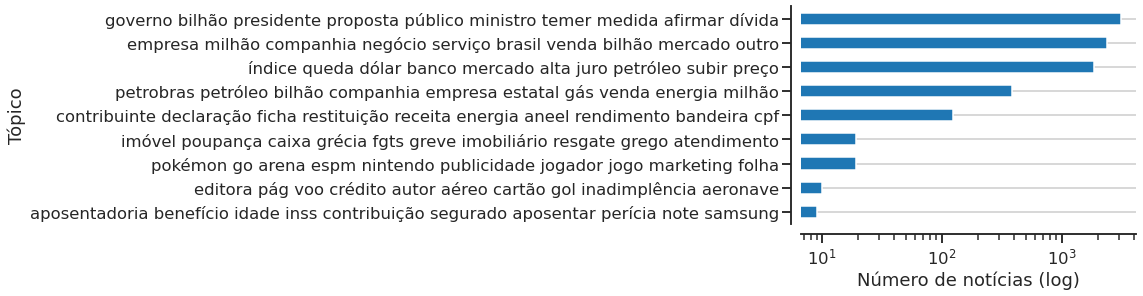

In [40]:
with sns.axes_style("ticks"):
    sns.set_context("talk")
    ax = news_2016['topic_name'].value_counts().sort_values().plot(kind = 'barh')
    ax.yaxis.grid(True)
    ax.set_ylabel("Tópico")
    ax.set_xlabel("Número de notícias (log)")
    sns.despine(offset = 10)
    ax.set_xscale("log")

## Número de documentos vs tópicos 

Esse gráfico nos mostra quantos documentos foram caracterizados por cada tópico.

C:\Users\herik\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\herik\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


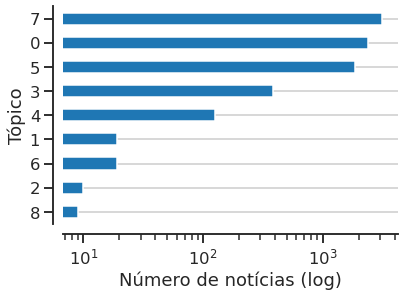

In [41]:
with sns.axes_style("ticks"):
    sns.set_context("talk")
    ax = news_2016['topic'].value_counts().sort_values().plot(kind = 'barh')
    ax.yaxis.grid(True)
    ax.set_ylabel("Tópico")
    ax.set_xlabel("Número de notícias (log)")
    sns.despine(offset = 10)
    ax.set_xscale("log")

## Crie uma nuvem de palavra para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa. 

**16. Cole a figura com a nuvem de palavras para cada um dos 9 tópicos criados.**

A nuvem de palavras foi gerada utilizando Wordcloud, utilizando **todas** palavras categorizadas pelo LDA.

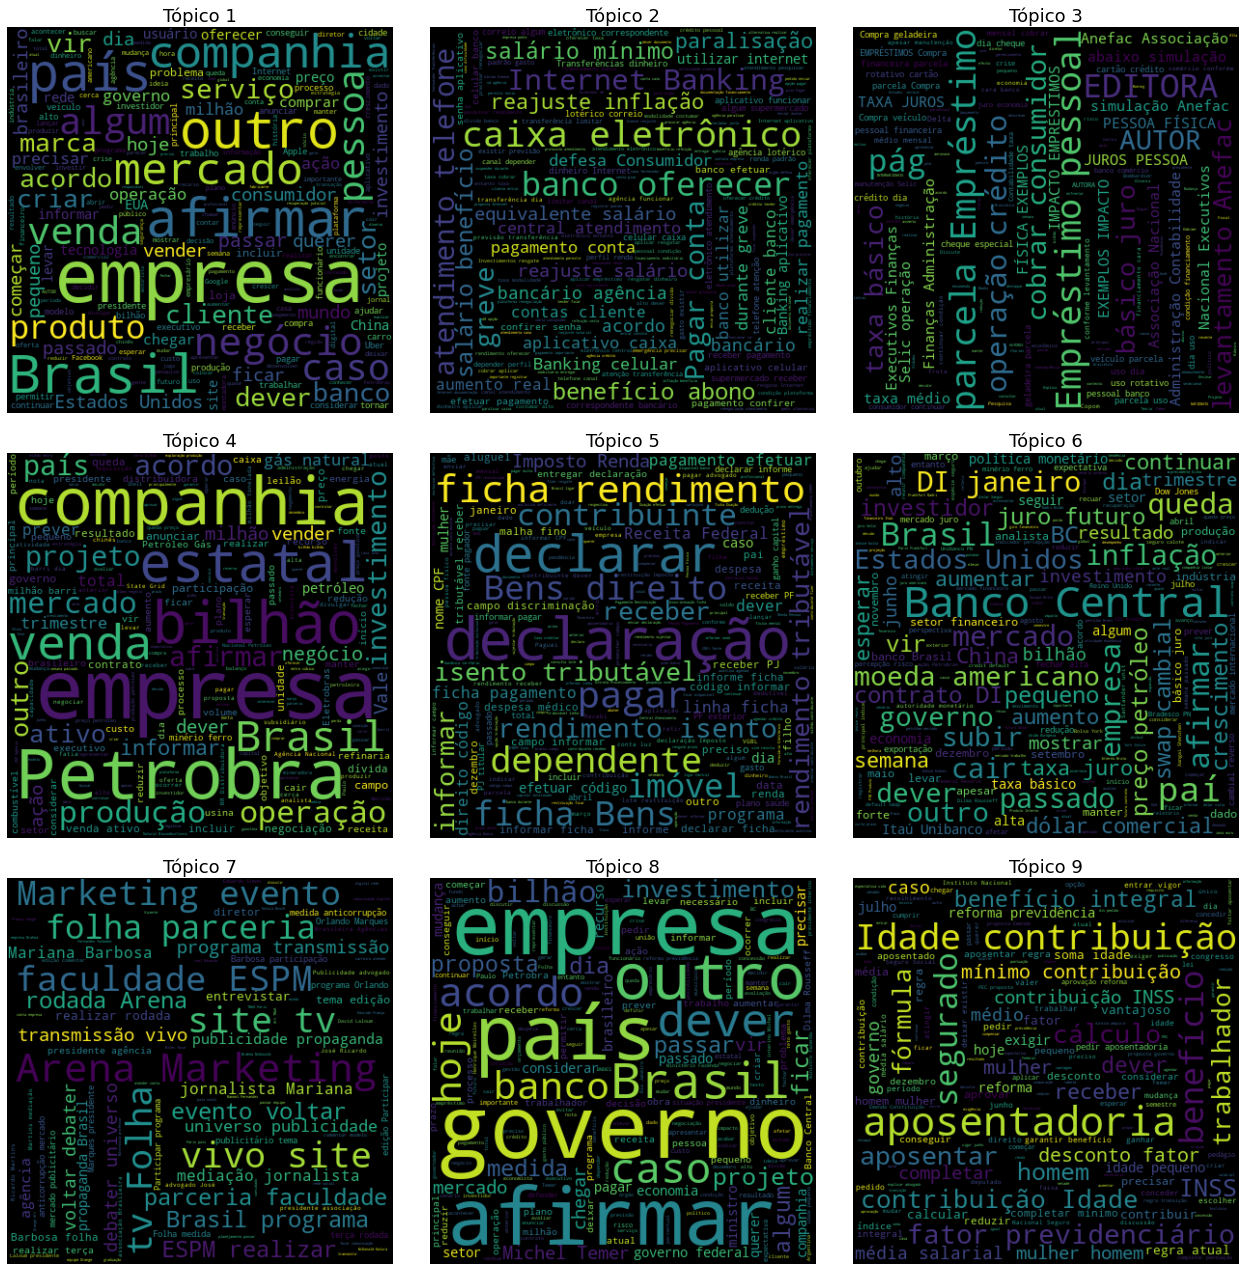

In [42]:
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

for idx_topico in range(9):
    # Calcula a respectiva linha e coluna do plot
    row = idx_topico // 3
    col = idx_topico % 3
    
    # Constroi a lista de palavras da wordcloud
    topic_news = news_2016[news_2016['topic'] == idx_topico]
    list_of_words = chain(*topic_news.spacy_lemma.values.tolist())
    string_complete = ' '.join(list_of_words)
    
    # Alimenta a wordcloud e joga no subplot
    wordcloud = WordCloud(width=400, height=400).generate_from_text(string_complete)
    axs[row, col].imshow(wordcloud, interpolation='bilinear')
    axs[row, col].axis('off')
    axs[row, col].set_title(f"Tópico {idx_topico+1}")

plt.tight_layout()
plt.show()

## Crie uma nuvem de entidades para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa. 

**11. Cole a figura gerada que mostra a nuvem de entidades para cada tópico obtido (no final do notebook)**

Nuvem de palavras geradas apartir somente das entidades do tipo organização (filtradas anteriormente conforme solicitado).

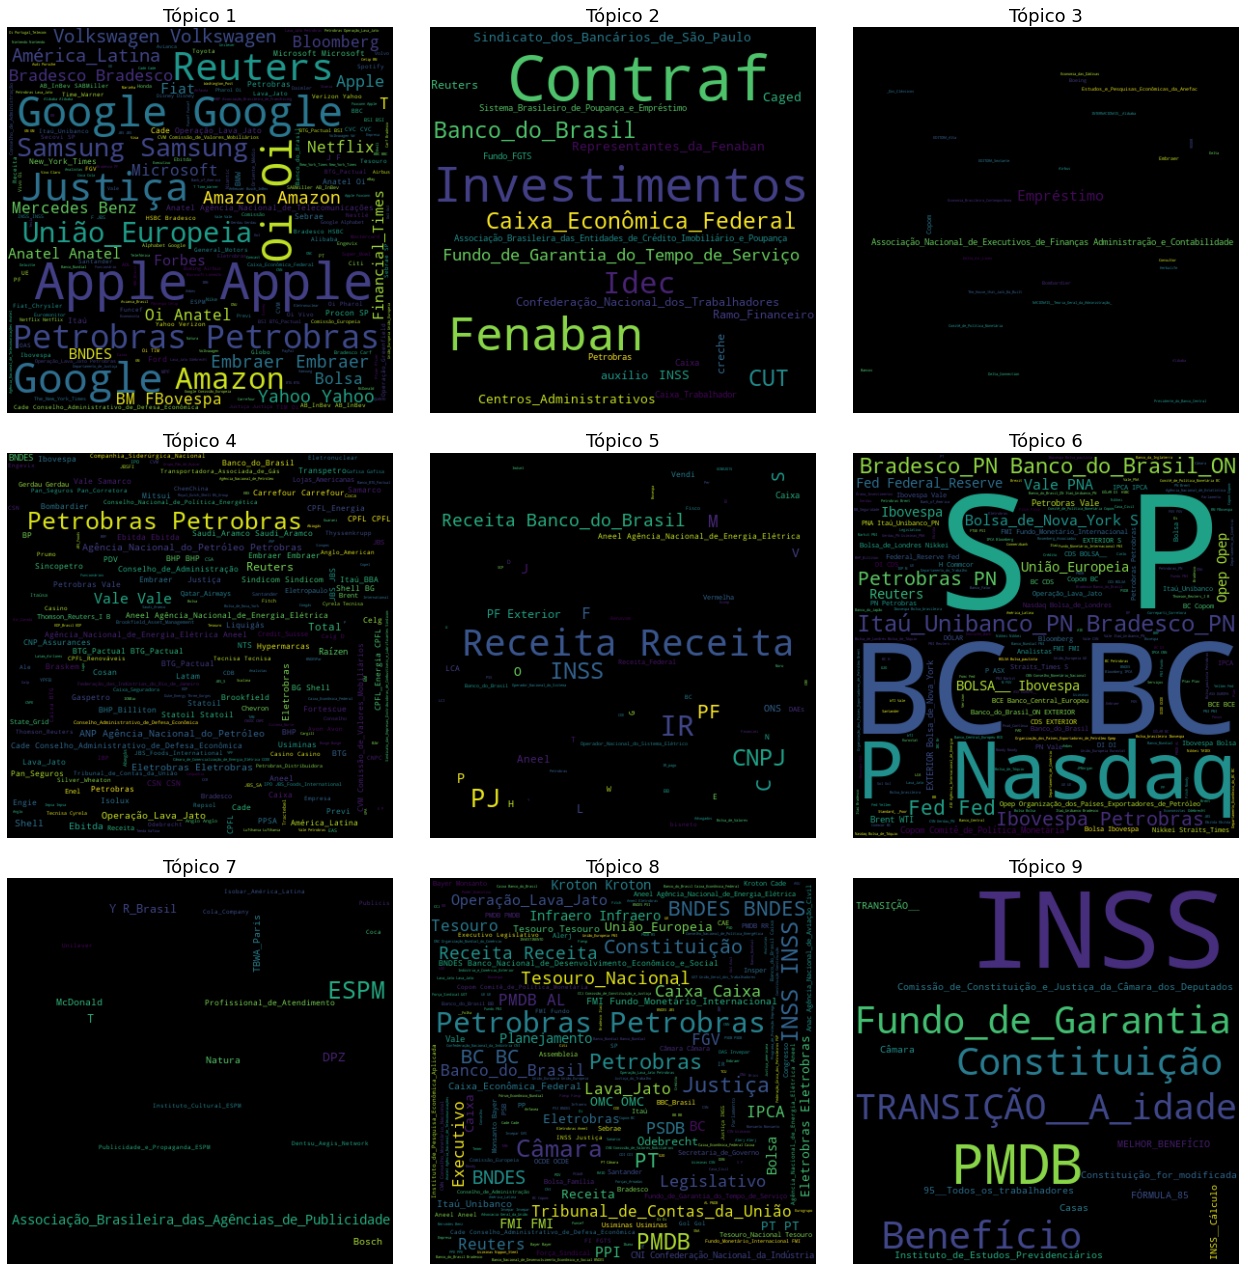

In [43]:
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

for idx_topico in range(9):
    # Calcula a respectiva linha e coluna do plot
    row = idx_topico // 3
    col = idx_topico % 3
    
    # Constroi a lista de palavras da wordcloud
    topic_news = news_2016[news_2016['topic'] == idx_topico]
    list_of_docs = topic_news.spacy_ner.apply(lambda l : [w.replace(" ", "_") for w in l])
    list_of_words = chain(*list_of_docs)
    string_complete = ' '.join(list_of_words)
    
    # Alimenta a wordcloud e joga no subplot
    wordcloud = WordCloud(width=400, height=400).generate_from_text(string_complete)
    axs[row, col].imshow(wordcloud, interpolation='bilinear')
    axs[row, col].axis('off')
    axs[row, col].set_title(f"Tópico {idx_topico+1}")

plt.tight_layout()
plt.show()

## Perguntas Extras:

**12. Quando adotamos uma estratégia frequentista para converter textos em vetores, podemos fazê-lo de diferentes maneiras. Mostramos em aula as codificações One-Hot, TF e TF-IDF. Explique a principal motivação em adotar TF-IDF frente as duas outras opções.**
<br><br>
A principal vantagem do TF-IDF é o tratamento da imporância de cada termo. O One-Hot é binário, indicando 0 ou 1 de acordo com a existência do termo, não levando em consideração a sua frequência. Já o TF considera a frequência de cada termo, contabilizando o numero de ocorrências de cada um. 
<br><br>
Por ultimo o TF-IDF junta a frequência dos termos (TF) e a sua importância para o documento (IDF), dessa forma analisa o quanto um termo aparece por documento e em todos os documentos, dando maior peso para os termos que aparecem menos e são mais distintos nos documentos.
<br><br>
Assim o TF-IDF consegue trazer mais valor para o documento analisado, dessa forma não é tão influenciado pelo viés de numero de palavras e ocorrências em um texto, podendo agregar maior valor e ser usado até para tarefas como analise de sentimentos e identificação de spam em emails.

**17. Escreva brevemente uma descrição para cada tópico extraído. Indique se você considera o tópico extraído semanticamente consistente ou não.**
<br><br>
['quanto', 'editora', 'pág', 'whatsapp', 'volkswagen', 'investigação', 'autor', 'montadora', 'pokémon', 'justiça']<br>
Tópico 1: Aparenta se referir a investigações e noticias da investigação de montadoras, como por exemplo a vokswagen. A semântica não parece ser consistente devido a alta divergências dos termos.

['de', 'empresa', 'por', 'bilhão', 'banco', 'país', 'brasil', 'milhão', 'mercado', 'em']<br>
Tópico 2: O tópico se refere a economia e industria, como por exemplo bancos. Esse tópico já parece ter uma coesão alta entre os termos.

['petrobras', 'de', 'energia', 'petróleo', 'estatal', 'gás', 'distribuidora', 'eletrobras', 'usina', 'combustível']<br>
Tópico 3: Esse tópico se refere ao mercado de energia, gas e petroleo, termos que estão relacionados entre-si, de forma que possui uma alta coesão entre os termos, com alto foco na industria de energia.

['uber', 'carro', 'motorista', 'veículo', 'estácio', 'kroton', 'autônomo', 'montadora', 'state', 'tesla']<br>
Tópico 4: O tópico se refere a industria de automoveis, não necesariamente só montadoras mas veiculos em geral, realizando menção a modelos de carros e plataformas de locomoção como Uber. A coesão semântica é alta, entretanto possui alguns termos não relacionados ao tópico em geral.

['contribuinte', 'declaração', 'restituição', 'receita', 'lote', 'cpf', 'ir', 'de', 'malha', 'fino']<br>
Tópico 5: Esse tópico se refere ao pagamento de impostos do contribuinte, principalmente sobre o período de pagamento do imposto de renda, todos os seus termos estão altamente ligados.

['de', 'índice', 'dólar', 'alta', 'juro', 'bolsa', 'mercado', 'on', 'banco', 'subir']<br>
Tópico 6: Focado na macro-economia se referindo a bolsa de valores, alta do dolar e juros. Semelhante ao tópico 2, entretanto o tópico 2 tinha maior foco na micro-economia. O tópico possui alta coesão entre os termos.

['petróleo', 'opep', 'barri', 'produção', 'irã', 'saudita', 'de', 'arábia', 'projeção', 'focus']<br>
Tópico 7: O tópico 7 refere-se ao mercado internacional de petróleo, focado nos paises arabes e sua importação. O tópico possui alta coesão.

['oi', 'telecom', 'credor', 'anatel', 'cebrap', 'debate', 'judicial', 'invepar', 'tanure', 'pharol']<br>
Tópico 8: Esse refere-se as telecomunicadores como por exemplo a Oi, a coesão do tópico é menor que a dos demais apesar de ainda ter coesão maior que o tópico 1.

['de', 'governo', 'proposta', 'temer', 'ministro', 'bilhão', 'por', 'público', 'presidente', 'federal']<br>
Tópico 9: O tópico se refere a política e ao governo, especificamente sobre a presidência e seus ministros. A coesão do termo também é alta.

**18. Neste projeto, usamos TF-IDF para gerar os vetores que servem de entrada para o algoritmo de LDA. Quais seriam os passos para gerar vetores baseados na técnica de Doc2Vec?**
<br><br>
Como já foi realizado a limpeza dos textos durante o notebook, para gerar os vetores baseados na técnica de Doc2Vec, será necessário preparar os dados no formato esperado do algoritmo.<br>

Pressupondo que já foram removidas as stopwords, pontuações, termos indesejaveis, espaços, convertido para caixa baixa. Será necessário adaptar a estrutura existente para o algoritmo Doc2Vec. Os proximos passos seriam:<br>
   - Separar os dados em base de treino e teste;
   - Gerar as tagas para cada documento, então seria necessario gerar um objeto com as palavras daquele documento e a tag representando o conteudo;
   - Instanciar o objeto de Doc2Vec, nesse momento deve ser parametrizado o objeto, como por exemplo: Algoritmo a ser usado, frequência minima da palavra para ser considerada, palavras de ruido a serem consideradas, conjunto;
   - Construção do vocabulario usando objeto instanciado anteriormente;
   - Treinamento do modelo;
   - Criação de um modelo para classificação das tags, como por exemplo Regressão Logistica.
   
   

**19. Em uma versão alternativa desse projeto, optamos por utilizar o algoritmo de K-Médias para gerar os clusters (tópicos). Qual das abordagens (TF-IDF ou Doc2Vec) seria mais adequada como processo de vetorização? Justifique com comentários sobre dimensionalidade e relação semântica entre documentos.
Leia o artigo "Introducing our Hybrid lda2vec Algorithm" (https://multithreaded.stitchfix.com/blog/2016/05/27/lda2vec/#topic=38&lambda=1&term=) .**
<br><br>
TF-IDF é uma tecnica de vetorização estatistica, de forma que será multiplicado o número de vezes que uma palavra em um documento pelo numero de documentos que contem a palavra, resultando em um valor estatistico para cada palavra em cada documento, dessa forma o algoritmo pode não ter resultados satisfatorios com multiplos documentos de diferentes tamanhos. Ja o Doc2Vec é um algoritmo basado em redes neurais, compreendendo o valor semântico entre as palavras.
<br><br>
O algoritmo K-Means irá realizar o agrupamento e a de documentos que possuam similaridade entre si, a similaridade será calculada baseada nas informações que forem dadas como entrada, para compreender a similaridade o Doc2Vec é mais adequado, visto que não irá trazer somente uma medida estatistica, mas sim o valor semântico entre as palavras.

**20. O algoritmo lda2vec pretende combinar o poder do word2vec com a interpretabilidade do algoritmo LDA. Em qual cenário o autor sugere que há benefícios para utilização deste novo algoritmo?**
<br><br>
O algoritmo lda2vec une o poder do word2vec e LDA, dessa forma é possível realizar uma analista mista, analisando globalmente os documentos e tambem localmente, trazendo o poder de analise individual por palavra e geral dos documentos, realizando identificação de contexto com maior precisão.
<br><br>
O autor comenta que o principal beneficio do algoritmo lda2vec é visto quando quer construir modelos para humanos e não para maquinas, como no exemplo dado em que é gerado a previsão de tópicos centrais para cada sentença. Ainda assim o autor não recomenda o uso do lda2vec, mantendo a recomendação do LDA quando se trata de tópicos legiveis para humanos e o word2vec para maquinas.
<br><br>
Também é comentado que o algoritmo não possui uma implementação tão fácil quanto o word2vec ou LDA, além de possuir um custo computacional muito superior e ser extremamente recomendado o uso de GPUs para a sua execução.